In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LinearRegression,LogisticRegression

In [3]:
iris=load_iris()
x=iris.data
y=iris.target

In [54]:
##to implement bagging classifier as naive bayes as a base estimator
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model1=BaggingClassifier(estimator=GaussianNB(),n_estimators=4,random_state=42)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_pred1
##comparing with Rnadom forest classiifer
model2=RandomForestClassifier(n_estimators=100,random_state=42)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
##classification using AdaBoost
model3=AdaBoostClassifier(estimator=DecisionTreeClassifier(),n_estimators=52,random_state=42)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
##classification using DecisionTree classifier
model4=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=42)
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
y_pred4
##logistic regression
model5=LogisticRegression(max_iter=100,random_state=42)
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
y_pred5

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

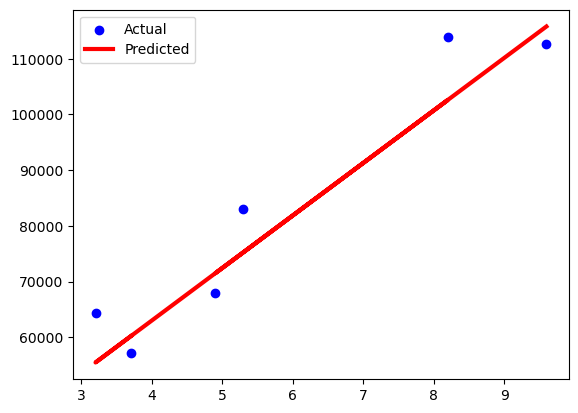

In [66]:
##linear regression
import pandas as pd
data=pd.read_csv("C:/Users/pc/Downloads/33ace369025ec4de0dfb9f22a0c5b09f-5d4d29e255ef0e7368e0808bd012fb3080ca22d7/33ace369025ec4de0dfb9f22a0c5b09f-5d4d29e255ef0e7368e0808bd012fb3080ca22d7/salary_Data.csv") 
data.head()
x=data[["YearsExperience"]]
y=data[["Salary"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
plt.scatter(x_test,y_test,color='Blue',label='Actual')
plt.plot(x_test,y_pred,linewidth=3,color='red',label='Predicted')
plt.legend()
plt.show()

In [78]:
##Kmeans
from sklearn.cluster import KMeans
iris=load_iris()
x=iris.data
y=iris.target
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)
pred=kmeans.predict(x)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


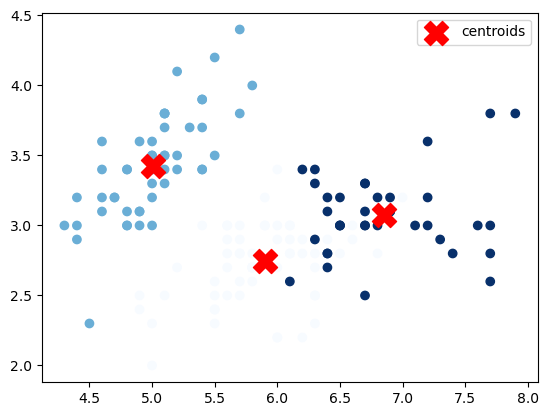

In [79]:
centers=kmeans.cluster_centers_
plt.scatter(x[:,0],x[:,1],c=pred,cmap='Blues')
plt.scatter(centers[:,0],centers[:,1],s=300,marker='X',color='red',label='centroids')
plt.legend()
plt.show()

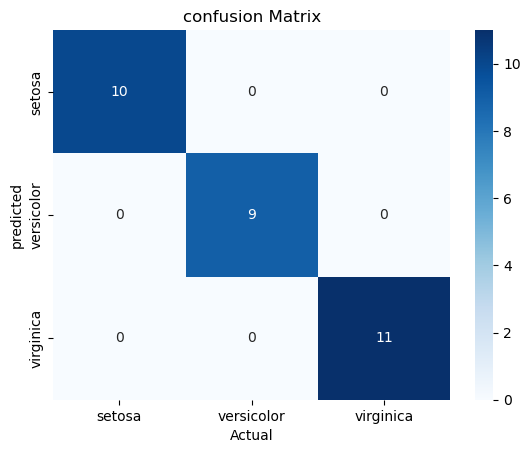

In [26]:
cm1=confusion_matrix(y_test,y_pred1)
sns.heatmap(cm1,annot=True,cmap="Blues",xticklabels=iris.target_names,yticklabels=iris.target_names,fmt="d")
plt.title("confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [55]:
print(f"ACCURACY OF bagging classifier as naibe bayes a base estimatore is {accuracy_score(y_test,y_pred1)*100}%")
print(f"ACCURACY OF randomforest classifier is {accuracy_score(y_test,y_pred2)*100}%")
print(f"ACCURACY OF adaboost classifier is {accuracy_score(y_test,y_pred3)*100}%")
print(f"ACCURACY OF Decisiontree classifier is {accuracy_score(y_test,y_pred4)*100}%")
print(f"ACCURACY OF Logistic Regressionr is {accuracy_score(y_test,y_pred5)*100}%")

ACCURACY OF bagging classifier as naibe bayes a base estimatore is 100.0%
ACCURACY OF randomforest classifier is 100.0%
ACCURACY OF adaboost classifier is 100.0%
ACCURACY OF Decisiontree classifier is 100.0%
ACCURACY OF Logistic Regressionr is 100.0%


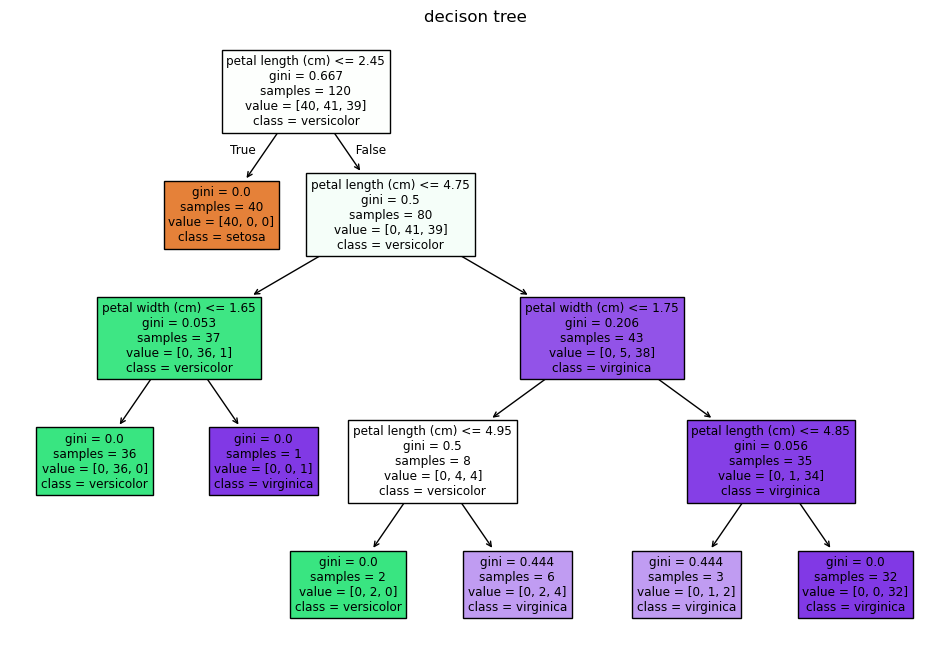

In [59]:
plt.figure(figsize=(12,8))
plot_tree(model4,max_depth=4,feature_names=iris.feature_names,class_names=iris.target_names,label='all',filled=True)
plt.title("decison tree")
plt.show()

In [56]:
plot_tree?


Signature:
plot_tree(
    decision_tree,
    *,
    max_depth=None,
    feature_names=None,
    class_names=None,
    label='all',
    filled=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rounded=False,
    precision=3,
    ax=None,
    fontsize=None,
)
Docstring:
Plot a decision tree.

The sample counts that are shown are weighted with any sample_weights that
might be present.

The visualization is fit automatically to the size of the axis.
Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
the size of the rendering.

Read more in the :ref:`User Guide <tree>`.

.. versionadded:: 0.21

Parameters
----------
decision_tree : decision tree regressor or classifier
    The decision tree to be plotted.

max_depth : int, default=None
    The maximum depth of the representation. If None, the tree is fully
    generated.

feature_names : array-like of str, default=None
    Names of each of the features.
    If None, generic names will be used ("x[0]

In [39]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [38]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [53]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation, or no regularization. The 'liblinear' solver
supports both L1 and L2 regularization, with a dual formulation only for
